# Hyperparameters

Кілька прикладів гіперпараметрів, які оптимізують для нейронних мереж:
1. **Кількість шарів (layers)**: Кількість шарів у нейронній мережі визначається глибиною моделі.
2. **Кількість нейронів у кожному шарі (nodes)**: Це кількість нейронів у кожному шарі нейронної мережі.
3. **Швидкість навчання (learning rate)**: Це параметр, який визначає, наскільки швидко модель навчається під час процесу навчання.
4. **Функції активації (activation functions)**: Вони використовуються для передачі сигналів між нейронами у шарах.
5. **Батч-розмір (batch size)**: Кількість прикладів навчання, які використовуються в одному кроці оптимізації.
6. **Кількість епох (epochs)**: Це кількість разів, коли весь набір даних пройшов через нейронну мережу під час навчання.
7. **Регуляризація (regularization)**: Такі як L1 або L2 регуляризація, які допомагають уникнути перенавчання.
8. **Тип оптимізатора (optimizer)**: Алгоритм, який використовується для оновлення ваг моделі під час навчання.
Тощо.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
# датасет по виявленню шахрайства з кредитною карткою
# dataset already obtained with PCA in order to secure users sensetive data
df = pd.read_csv("creditcard.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
len(df)

284807

In [29]:
# Number of fraud cases in dataset
len(df[df["Class"] == 1])

492

In [30]:
# Number of fraud cases in dataset in %
# Дані незбалансовані: 0,001727...
len(df[df["Class"] == 1]) / len(df)

0.001727485630620034

In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop("Class", axis=1)
y = df["Class"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True) # creates batches 128 samples

In [33]:
train_dataset[0] # not a froud looks like

(tensor([ 1.4116,  0.9934, -0.4560, -0.8941, -0.4673,  1.0892,  3.0244, -1.1949,
          0.9571,  1.2814, -0.1445, -0.1108,  0.5093,  0.0621, -0.0696,  1.4511,
          0.4044, -0.9074,  0.1691, -0.5554, -0.1731,  0.1032,  0.4096,  0.4907,
          1.1420, -0.6708, -0.8072,  0.1919, -0.0991, -0.3225]),
 tensor(0.))

In [34]:
train_loader.__dict__

{'dataset': <torch.utils.data.dataset.TensorDataset at 0x22f4d4bc0e0>,
 'num_workers': 0,
 'prefetch_factor': None,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 128,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x22f1fa19490>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x22f1fdf10d0>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [35]:
# use other metric rather than accuracy
predictions = torch.tensor( [0]*len(y_test)) # if we naively classify all as 0
accuracy = (predictions == y_test_tensor).float().mean()
accuracy.item()

0.9982795715332031

In [36]:
y_test_tensor.sum()

tensor(98.)

In [37]:
len(y_test_tensor)

56962

In [38]:
def evaluate(y_test, predictions):
    print("Recall score (pos. 1):", recall_score(y_test.numpy(), predictions.numpy()))
    print("Precision score (pos. 1):", precision_score(y_test.numpy(), predictions.numpy()))
    print("F1 score (pos. 1):", f1_score(y_test.numpy(), predictions.numpy()))
    print("F1 score (weighted):", f1_score(y_test.numpy(), predictions.numpy(), average="weighted"))
    print("F1 score (micro):", f1_score(y_test.numpy(), predictions.numpy(), average="micro"))
    # F1 macro однаково зважує усі ваги і найбільше підійде для незбалансованих даних
    print("F1 score (marco):", f1_score(y_test.numpy(), predictions.numpy(), average="macro")) 

evaluate(y_test_tensor, predictions)

Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Build and optimize

### 1. Number of layers

In [39]:
class FraudDetectionModel_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [40]:
losses_experiment_1 = []

In [41]:
def run_experiment(model, loss_recording_list, lr=0.01, train_loader=train_loader, epochs=1, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()
    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr) # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())

    # Train the model
    loss_res = []
    for epoch in range(epochs):
        model. train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print("Loss:", loss.item())
    loss_recording_list.append(loss_res)

    # Evaluate the model on the test setl
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()
    
    evaluate(y_test_tensor, predictions)

In [55]:
model_1 = FraudDetectionModel_1()
run_experiment(model_1, losses_experiment_1)

Loss: 0.006081046536564827
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


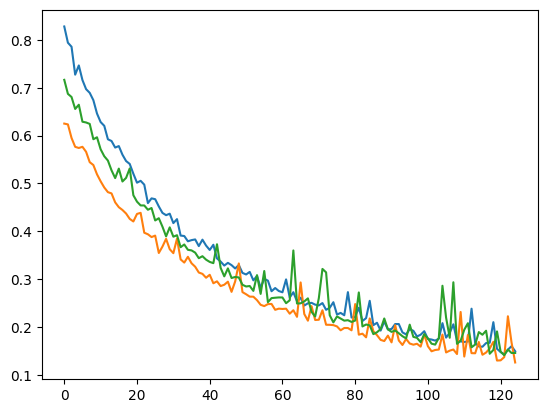

In [56]:
x_axis = range(len(losses_experiment_1[0]))
for line in losses_experiment_1:
    plt.plot(x_axis[:125], line[:125])

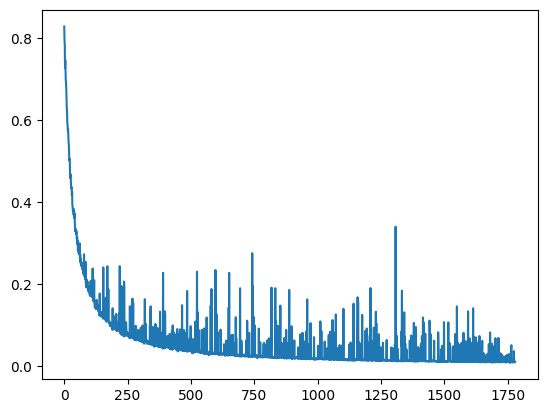

In [45]:
x_axis = range(len(losses_experiment_1[0]))
for line in losses_experiment_1:
    plt.plot(x_axis, line)

In [47]:
class FraudDetectionModel_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [46]:
losses_experiment_2 = []

In [57]:
model_2 = FraudDetectionModel_2()
run_experiment(model_2, losses_experiment_2)

Loss: 0.006713110953569412
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


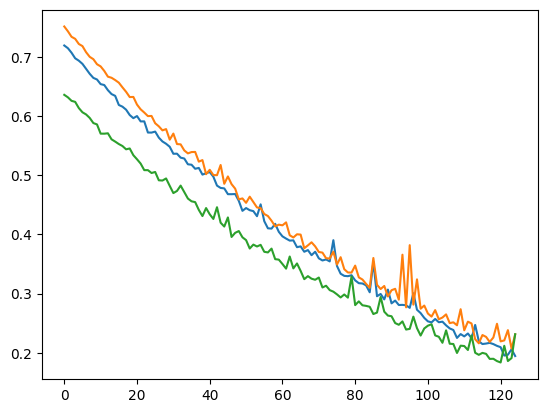

In [58]:
x_axis = range(len(losses_experiment_2[0]))
for line in losses_experiment_2:
    plt.plot(x_axis[:125], line[:125])

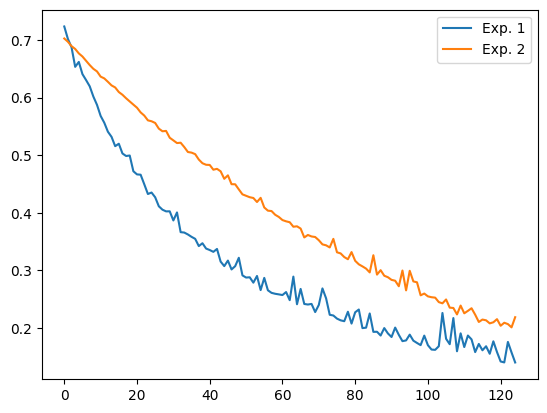

In [59]:
# Compare

losses_experiment_1_mean= np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean=np.array(losses_experiment_2).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt. legend()

### Number of Nodes

In [60]:
# Add more nodes

class FraudDetectionModel_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1= nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [61]:
losses_experiment_3 = []

In [65]:
model_3 = FraudDetectionModel_3()

run_experiment(model_3, losses_experiment_3)

Loss: 0.0030900079291313887
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


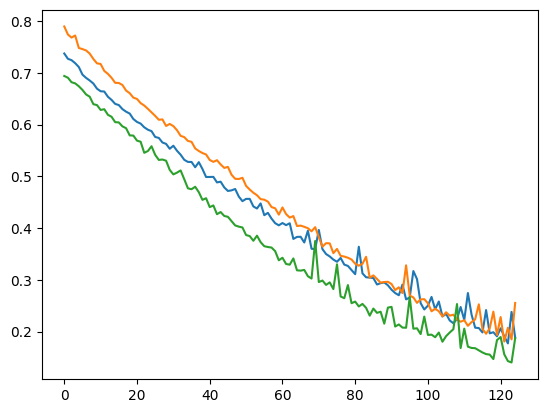

In [66]:
x_axis = range(len(losses_experiment_3[0]))
for line in losses_experiment_3:
    plt.plot(x_axis[:125], line[:125])

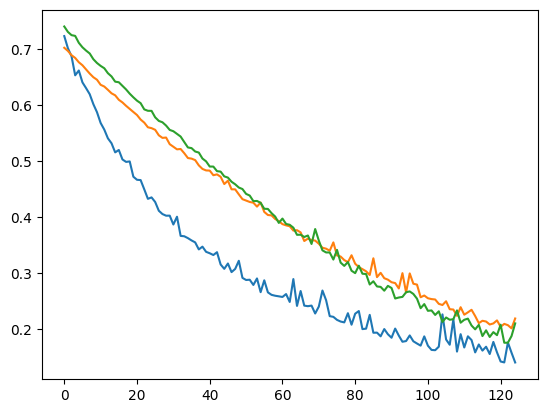

In [68]:
# Compare

losses_experiment_1_mean=np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean=np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean=np.array(losses_experiment_3).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")

In [70]:
# Return to the simple model and increase number of nodes

class FraudDetectionModel_4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [71]:
losses_experiment_4 = []

In [73]:
model_4 = FraudDetectionModel_4()
run_experiment(model_4, losses_experiment_4)

Loss: 0.012159144505858421
Recall score (pos. 1): 0.02040816326530612
Precision score (pos. 1): 1.0
F1 score (pos. 1): 0.04
F1 score (weighted): 0.9975064162696808
F1 score (micro): 0.9983146659176293
F1 score (marco): 0.5195782963171212


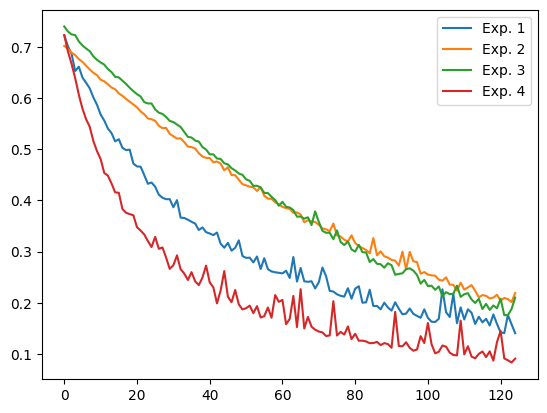

In [74]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean=np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean=np.array(losses_experiment_4).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")

plt.legend()

### 3. Learning rate

In [75]:
losses_experiment_5 = []

In [86]:
model_5 = FraudDetectionModel_4()

run_experiment(model_5, losses_experiment_5, lr=0.02)

Loss: 0.0045362296514213085
Recall score (pos. 1): 0.47959183673469385
Precision score (pos. 1): 0.8103448275862069
F1 score (pos. 1): 0.6025641025641025
F1 score (weighted): 0.9987722021948922
F1 score (micro): 0.9989115550718023
F1 score (marco): 0.8010095669279271


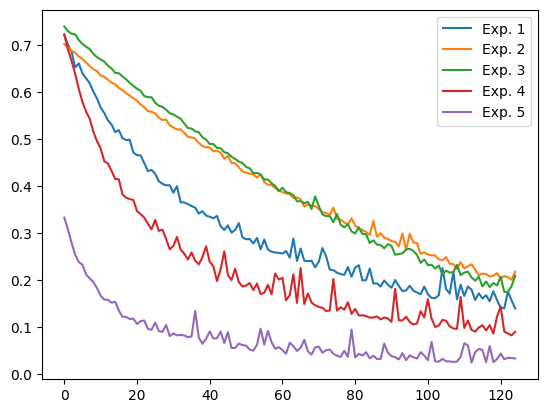

In [87]:
# Compare

losses_experiment_1_mean=np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean= np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean=np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean=np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean= np.array(losses_experiment_5).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")

plt.legend()

### 4. Activation function

https://medium.com/@juanc.olamendy/understanding-relu-leakyrelu-and-prelu-a-comprehensive-guide-20f2775d3d64

In [88]:
# Replace ReLU with PReLU

class FraudDetectionModel_6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn. PReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [89]:
losses_experiment_6 = []

In [96]:
model_6 = FraudDetectionModel_6()

run_experiment(model_6, losses_experiment_6, lr=0.02)

Loss: 0.00562635250389576
Recall score (pos. 1): 0.336734693877551
Precision score (pos. 1): 0.75
F1 score (pos. 1): 0.4647887323943662
F1 score (weighted): 0.9984124035367727
F1 score (micro): 0.9986657771847899
F1 score (marco): 0.7320603942156746


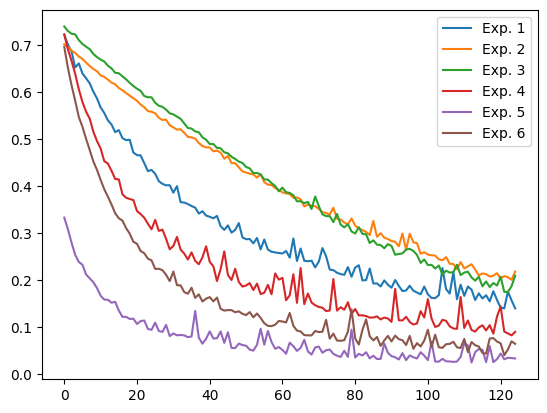

In [97]:
# Compare

losses_experiment_1_mean=np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean= np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean=np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean=np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean= np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean= np.array(losses_experiment_6).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")

plt.legend()

### 5. Batch size

In [98]:
train_loader_new = DataLoader(train_dataset, batch_size=128*2, shuffle=True)

In [99]:
losses_experiment_7 = []

In [107]:
model_7 = FraudDetectionModel_6()

run_experiment(model_7, losses_experiment_7, lr=0.02, train_loader=train_loader_new)

Loss: 4.518339157104492
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


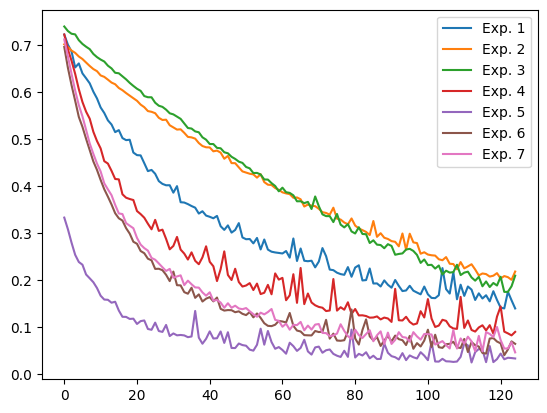

In [108]:
# Compare

losses_experiment_1_mean=np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean= np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean=np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean=np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean= np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean= np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean= np.array(losses_experiment_7).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")


plt.legend()

### 6. Number of epochs

In [109]:
losses_experiment_8 = []

In [113]:
model_8 = FraudDetectionModel_6()

run_experiment(model_8, losses_experiment_8, lr=0.02, epochs=3)

Loss: 0.004275339189916849
Loss: 0.0026201880536973476
Loss: 0.0013111255830153823
Recall score (pos. 1): 0.6938775510204082
Precision score (pos. 1): 0.8095238095238095
F1 score (pos. 1): 0.7472527472527473
F1 score (weighted): 0.9991614339419104
F1 score (micro): 0.9991924440855307
F1 score (marco): 0.8734241616026709


In [ ]:
# Compare
from scipy.ndimage.filters import gaussian_filter1d

x_axis_short =range(len(losses_experiment_1[0]))
x_axis_shorter = range(len(losses_experiment_7[0]))
x_axis_long=range(len(losses_experiment_8[0]))

C:\Users\yulic\AppData\Local\Temp\ipykernel_33268\3712786.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


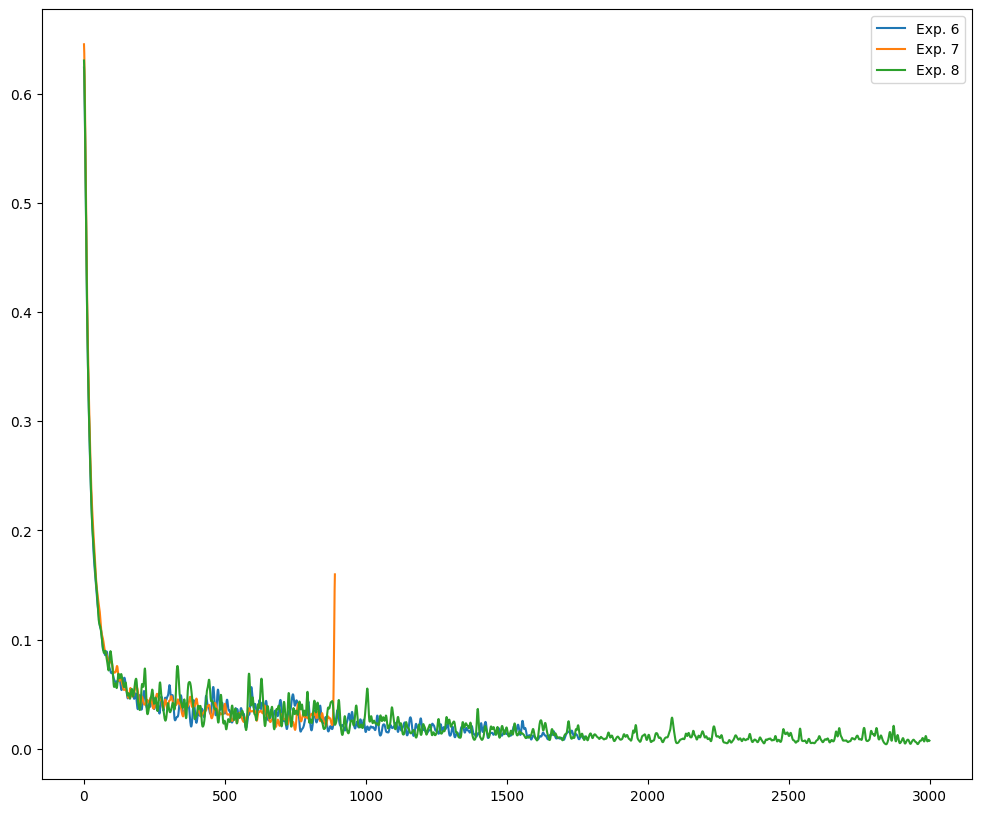

In [114]:
# Compare
from scipy.ndimage.filters import gaussian_filter1d

x_axis_short =range(len(losses_experiment_1[0]))
x_axis_shorter = range(len(losses_experiment_7[0]))
x_axis_long=range(len(losses_experiment_8[0]))

losses_experiment_1_mean= np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean=np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean =np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean =np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean=np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean= np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean= np.array(losses_experiment_8).mean(axis=0)

plt.figure(figsize=(12, 10))

#plt.plot(x_axis_short[800:], gaussian_filterld(losses_experiment_l_mean[800:], sigma=3), label="Exp. 1")
#plt.plot(x_axis_short[800:], gaussian_filterld(losses_experiment_2_mean[800:], sigma=3), label="Exp. 2")
#plt.plot(x_axis_short[800:], gaussian_filterld(losses_experiment_3_mean[800:], sigma=3), label="Exp. 3")
#plt.plot(x_axis_short[800:], gaussian_filterld(losses_experiment_4_mean[800:], sigma=3), label="Exp. 4")
#plt.plot(x_axis_short[800:], gaussian_filterld(losses_experiment_5_mean[800:], sigma=3), label="Exp. 5")
plt.plot(x_axis_short[:], gaussian_filter1d(losses_experiment_6_mean[:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[:], gaussian_filter1d(losses_experiment_7_mean[:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[:3000], gaussian_filter1d(losses_experiment_8_mean[:3000], sigma=3), label="Exp. 8")

plt.legend()

In [116]:
# How do we know where to stop?

def run_experiment_with_early_stopping(model, loss_recording_list, lr=0.01, train_loader=train_loader, val_loader=None, epochs=1, patience=5, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()

    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr) # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())

    # Train the model
    train_loss_res = []
    val_loss_res = []

    best_val_loss = float('inf')
    no_improvement_count = 0

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            train_loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+ 1}/{epochs}, Training Loss: {loss.item()}")

        # Calculate validation loss
        if val_loader:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = model(val_inputs)
                    val_loss += criterion(val_outputs.squeeze(), val_labels).item()
            avg_val_loss = val_loss / len(val_loader)
            val_loss_res.append(avg_val_loss)
            print(f"Epoch {epoch+ 1}/{epochs}, Validation Loss: {avg_val_loss}")

            # Check for early stopping
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                if no_improvement_count >= patience:
                    print(f"Early stopping after {epoch + 1} epochs with no improvement.")
                    break

    loss_recording_list.append({'train_loss': train_loss_res, 'val_loss': val_loss_res})

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()

    evaluate(y_test_tensor, predictions)

In [117]:
losses_experiment_8_2 = []

In [118]:
model_8_2 = FraudDetectionModel_6()

# Create PyTorch DataLoader
val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

run_experiment_with_early_stopping(model_8_2, losses_experiment_8_2, val_loader=val_loader, lr=0.02, epochs=20, patience=2)

Epoch 1/20, Training Loss: 0.007692987564951181
Epoch 1/20, Validation Loss: 0.011809118981097278
Epoch 2/20, Training Loss: 0.0018145445501431823
Epoch 2/20, Validation Loss: 0.008059154869414316
Epoch 3/20, Training Loss: 0.0016509998822584748
Epoch 3/20, Validation Loss: 0.007153286462369889
Epoch 4/20, Training Loss: 0.0008950458141043782
Epoch 4/20, Validation Loss: 0.006645691526517055
Epoch 5/20, Training Loss: 0.001008871360681951
Epoch 5/20, Validation Loss: 0.006181991612643103
Epoch 6/20, Training Loss: 0.0006559124449267983
Epoch 6/20, Validation Loss: 0.005702465442306834
Epoch 7/20, Training Loss: 0.0007151344907470047
Epoch 7/20, Validation Loss: 0.0054912887195975105
Epoch 8/20, Training Loss: 0.0013464188668876886
Epoch 8/20, Validation Loss: 0.004951733967650582
Epoch 9/20, Training Loss: 0.0017369820270687342
Epoch 9/20, Validation Loss: 0.0044953406014742806
Epoch 10/20, Training Loss: 0.00038994717760942876
Epoch 10/20, Validation Loss: 0.004155986606939006
Epoch 1

In [119]:
losses_experiment_8_2_train = losses_experiment_8_2[len(losses_experiment_8_2)-1] ['train_loss']
losses_experiment_8_2_test = losses_experiment_8_2[len(losses_experiment_8_2)-1] ['val_loss']

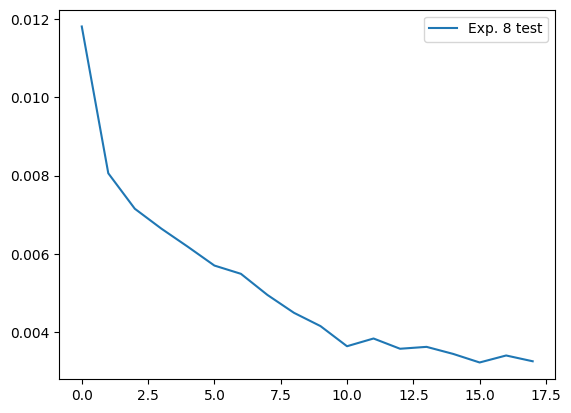

In [120]:
#plt.plot(x_axis_long[start:end], gaussian_filterld(losses_experiment_8_mean[start:end], sigma=1), label="Exp. 8")
#plt.plot(x_axis_long[start:end], gaussian_filterld(losses_experiment_8_mean_test[start:end], sigma=1), label="Exp. 8 test")

x_axis_train = [i for i in range(len(losses_experiment_8_2_train))]
#plt.plot(x_axis_train, losses_experiment_8_2_train, label="Exp. 8")

factor = len(x_axis_train) // len(losses_experiment_8_2_test)
#x_axis_test = [(i+1)*factor for i in range(len(lofses_experiment_8_2_test))]
x_axis_test = [i for i in range(len(losses_experiment_8_2_test))]
plt.plot(x_axis_test, losses_experiment_8_2_test, label="Exp. 8 test")

plt.legend()

### 7. Regularization

### Drop Out

In [ ]:
# Add dropout

class FraudDetectionModel_7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.dropout1= nn.Dropout(0.3) # вірогідність для кожного нейрона бути виключеним, тут 30%
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [122]:
losses_experiment_9 = []

In [125]:
model_9 = FraudDetectionModel_7()

run_experiment(model_9, losses_experiment_9, lr=0.02, epochs=3)

Loss: 0.003226981032639742
Loss: 0.0026258244179189205
Loss: 0.0005306130042299628
Recall score (pos. 1): 0.7040816326530612
Precision score (pos. 1): 0.8214285714285714
F1 score (pos. 1): 0.7582417582417582
F1 score (weighted): 0.9991978933357405
F1 score (micro): 0.9992275552122467
F1 score (marco): 0.8789274589242939


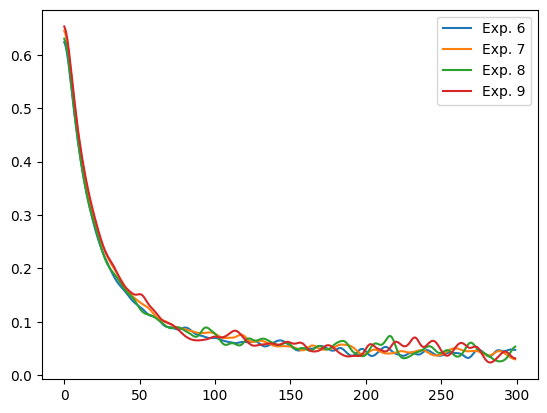

In [130]:
# Compare

losses_experiment_1_mean= np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean= np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean= np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean= np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean= np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean=np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean=np.array(losses_experiment_9).mean(axis=0)

start = 0
end = 300
plt.plot(x_axis_short[start:end], gaussian_filter1d(losses_experiment_6_mean[start:end], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:end], gaussian_filter1d(losses_experiment_7_mean[start:end], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")

plt.legend()

### 8. Optimizer

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [131]:
losses_experiment_10 = []

In [136]:
model_10 = FraudDetectionModel_7()

run_experiment(model_10, losses_experiment_10, lr=None, epochs=3, optimizer=optim.Adam)

Loss: 0.00025816712877713144
Loss: 0.0021989119704812765
Loss: 0.00010246774036204442
Recall score (pos. 1): 0.8163265306122449
Precision score (pos. 1): 0.8080808080808081
F1 score (pos. 1): 0.8121827411167513
F1 score (weighted): 0.999352089918879
F1 score (micro): 0.9993504441557529
F1 score (marco): 0.9059287003041704


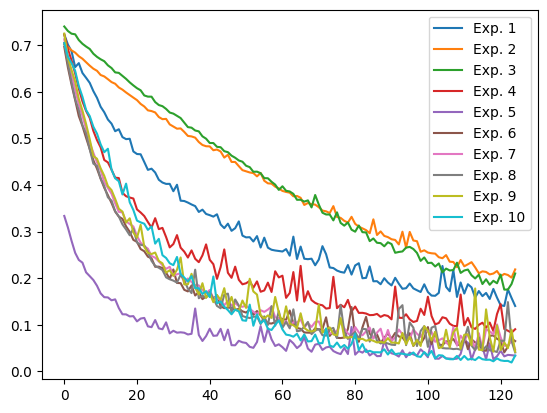

In [137]:
# Compare

losses_experiment_1_mean =np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean= np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean= np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean =np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")
plt.plot(x_axis[:125], losses_experiment_8_mean[:125], label="Exp. 8")
plt.plot(x_axis[:125], losses_experiment_9_mean[:125], label="Exp. 9")
plt.plot(x_axis[:125], losses_experiment_10_mean[:125], label="Exp. 10")

plt. legend()

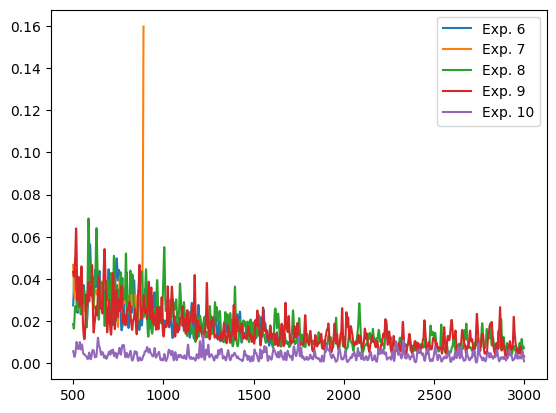

In [139]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean= np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean= np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean= np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean= np.array(losses_experiment_10).mean(axis=0)

start = 500
end = 3000
plt.plot(x_axis_short[start:], gaussian_filter1d(losses_experiment_6_mean[start:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:], gaussian_filter1d(losses_experiment_7_mean[start:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_10_mean[start:end], sigma=3), label="Exp. 10")

plt. legend()

# Hyperparameter Optimization

### Grid Search

In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, TransformerMixin

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df ['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(nn.ReLU())
            input_size = num_nodes

        self.model = nn.Sequential(*layers)

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# Define a custom PyTorch estimator for scikit-learn compatibility
class PyTorchEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, model, criterion=nn.BCELoss(), optimizer_class=optim.Adam, lr=0.001, batch_size=64, epochs=10):
        self.model = model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        print("Initialized new Estimator")

    def fit(self, X, y):
        train_dataset = TensorDataset(X, y)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        optimizer = self.optimizer_class(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs.squeeze(), labels)
                loss.backward()
                optimizer.step()

        return self
    
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            predictions = (outputs.squeeze() > 0.5).float()
        return predictions.numpy()

    def get_params(self, deep=True):
        return {'model': self.model, 'criterion': self.criterion,
                'optimizer_class': self.optimizer_class, 'lr': self.lr,
                'batch_size': self.batch_size, 'epochs': self.epochs}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
    
# Create a pipeline with the PyTorch model
pipeline = Pipeline([
    ('model', PyTorchEstimator(model=FraudDetectionModel(input_size=X_train.shape[1], num_layers=1, num_nodes=64)))
])

# Define hyperparameter grid for GridSearchCV
param_grid = {'model__num_layers': [1, 2, 3],
            'model__num_nodes': [32, 64, 128],
            'model__lr': [0.001, 0.01, 0.1]}

# Define F1 scorer for GridSearchCV
f1_scorer = make_scorer(f1_score)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=f1_scorer, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tensor, y_train_tensor)

# Print best hyperparameters and corresponding F1 score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized 

# Experiment Tracking with MLflow

https://www.mlflow.org/docs/latest/tracking.html#logging-data-to-runs

https://mlflow.org/docs/latest/getting-started/logging-first-model/notebooks/logging-first-model.html

In [ ]:
'''
$mlflow server -- host 127.0.0.1 -- port 8080
'''

In [ ]:
# Experiment tracking
import mlflow
from mlflow import MlflowClient

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")

all_experiments = client.search_experiments()
all_experiments

In [ ]:
# Use the fluent API to set the tracking uri and the active experiment
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Sets the current active experiment to the "Apple_Models" experiment and returns the Experiment metadata
experiment = mlflow.set_experiment("Python_Data_Models")
# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "HP_opt"

# Define an artifact path that the model will be saved to.

## Bayesian optimization

https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import optuna

# We use here Bayesian optimization
### Optuna uses a history record of trials to determine which hyperparameter values to try next.
### Using this data, it estimates a promising area and tries values in that area.
###Optuna then estimates an even more promising region based on the new result.
###It repeats this process using the history data of trials completed thus far.
###Specifically, it employs a Bayesian optimization algorithm called Tree-structured Parzen Estimator.
# Alternatives: https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/003_efficient_optimization_algorithms.html

# Display basic information about the dataset
print(df.info())

# Separate features and target variable
X= df.drop('Class', axis=1)
y = df ['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel with hyperparameters
class FraudDetectionModel(nn.Module):
    def _init_(self, input_size, num_layers, num_nodes, activation, dropout_rate):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(get_activation(activation))
            layers.append(nn.Dropout(dropout_rate))
            input_size = num_nodes

        self.model = nn.Sequential(*layers[ :- 2]) # Exclude the last activation and dropout

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x
    
def get_activation(activation):
    if activation == 'relu':
        return nn.ReLU()
    elif activation == 'tanh':
        return nn.Tanh()
    elif activation == 'sigmoid':
        return nn.Sigmoid()
    else:
        raise ValueError(f"Unknown activation function: {activation}")
    
# Define the objective function for Optuna
def objective(trial):
    print("Starting experiment")
    input_size = X_train.shape[1]
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_nodes = trial.suggest_int('num_nodes', 32, 256)
    activation = trial. suggest_categorical('activation', ['relu', 'tanh', 'sigmoid' ])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    batch_size = trial. suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 5, 30)

    model = FraudDetectionModel(input_size, num_layers, num_nodes, activation, dropout_rate)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model. train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, squeeze(), labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()

    f1 = f1_score(y_test_tensor.numpy(), predictions.numpy())

    # Log metrics with MLflow
    with mlflow.start_run(run_name=run_name) as run:
        mlflow. log_params({
            'num_layers': num_layers,
            'num_nodes': num_nodes,
            'activation': activation,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs})
        mlflow.log_metric('f1_score', f1)
    print("Ran experiment. 'f1_score'", f1)

    return f1 # Optimize for F1 score

# Run the hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters and corresponding F1 score
print(f"Best F1 Score: {-study.best_value :. 4f}")
print("Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"{key}: {value}")